In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import mpl_toolkits
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
covid_19 = pd.read_csv('/content/drive/MyDrive/464final/FINAL_DATA_TABLE.csv')


In [ ]:
covid_19.head()


,DAY,LAB_TEST,CONFIRMED_CASE,FIRST_DOSE,SECOND_DOSE,DEATH_CASE
0,20210408,33193,6854,14804,81323,74
1,20210410,26077,5343,19943,136703,77
2,20210411,29376,5819,23657,165691,78
3,20210412,34968,7201,22456,138879,83
4,20210413,32955,6028,26750,210579,69


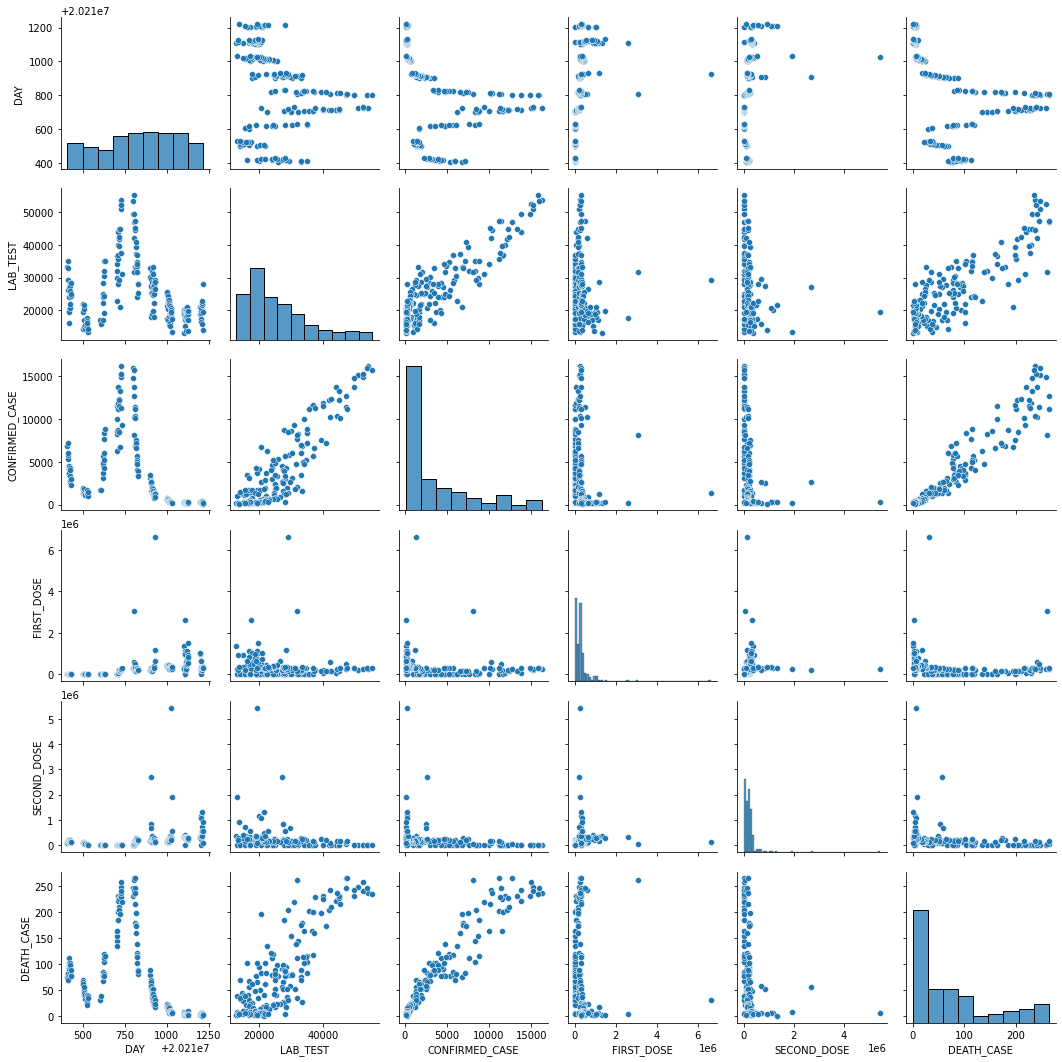

In [ ]:
sns.pairplot(covid_19)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


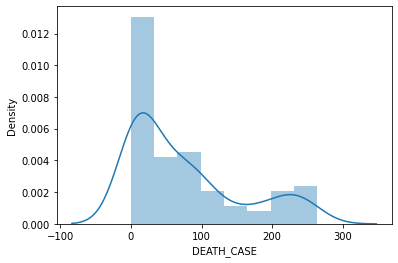

In [ ]:
sns.distplot(covid_19['DEATH_CASE'])

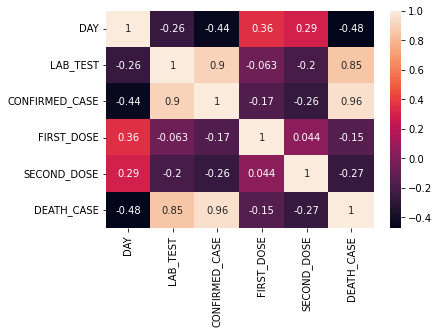

In [ ]:
sns.heatmap(covid_19.corr(), annot=True)

In [ ]:
#Multiple Regression using all column
X_mul = covid_19[['LAB_TEST', 'CONFIRMED_CASE', 'FIRST_DOSE', 'SECOND_DOSE']]

y_mul = covid_19['DEATH_CASE']

In [ ]:
#Multiple linear regression using First and Second dose with DeathCase column
X_first_second=covid_19[['FIRST_DOSE', 'SECOND_DOSE']]
y_first_second=covid_19['DEATH_CASE']

In [ ]:
#linear and polynomial regression using ConfirmCase with DeathCase column
X_lp = covid_19.iloc[:, 2:3].values
y_lp = covid_19.iloc[:, 5].values

In [ ]:
#Multiple regression with all colums train test
from sklearn.model_selection import train_test_split
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(X_mul, y_mul, test_size=0.2, random_state=0)

In [ ]:
#linear and polynomial regression train test
from sklearn.model_selection import train_test_split
X_lp_train, X_lp_test, y_lp_train, y_lp_test = train_test_split(X_lp, y_lp, test_size=0.2, random_state=0)

In [ ]:
#mul  regression train test with 1st and 2nd vaccine
from sklearn.model_selection import train_test_split
X_first_second_train, X_first_second_test, y_first_second_train, y_first_second_test = train_test_split(X_first_second, y_first_second, test_size=0.2, random_state=0)

In [ ]:
# Fitting multiple linear Regression with all coloms to the covid_19
from sklearn.linear_model import LinearRegression
mul = LinearRegression()
mul.fit(X_mul_train, y_mul_train)

LinearRegression()

In [ ]:
# Fitting Linear Regression to the covid_19
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_lp_train, y_lp_train)

LinearRegression()

In [ ]:
# Fitting Polynomial Regression to the covid_19
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_lp)
poly.fit(X_poly, y_lp)
lin2 = LinearRegression()
lin2.fit(X_poly, y_lp)

LinearRegression()

In [ ]:
# Fitting 1st and second vac dose Regression to the covid_19
from sklearn.linear_model import LinearRegression
first_second = LinearRegression()
first_second.fit(X_first_second_train, y_first_second_train)

LinearRegression()

Text(0, 0.5, 'Death_case')

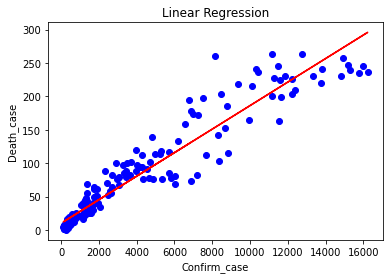

In [ ]:
# Visualising the Linear Regression results
plt.scatter(X_lp, y_lp, color = 'blue')
 
plt.plot(X_lp, regressor.predict(X_lp), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Confirm_case')
plt.ylabel('Death_case')

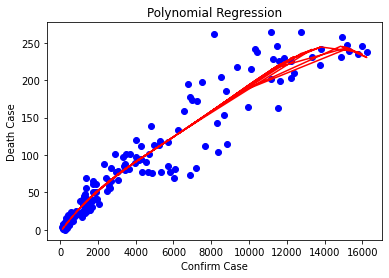

In [ ]:
# Visualising the Polynomial Regression results
plt.scatter(X_lp, y_lp, color = 'blue')
 
plt.plot(X_lp, lin2.predict(poly.fit_transform(X_lp)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Confirm Case')
plt.ylabel('Death Case')
 
plt.show()

In [ ]:
y_mul_pred = mul.predict(X_mul_test)


In [ ]:
y_lin_pred = regressor.predict(X_lp_test)

In [ ]:
y_poly_pred = lin2.predict(poly.fit_transform(X_lp_test))

In [ ]:
y_first_second_pred = first_second.predict(X_first_second_test)


In [29]:
df = pd.DataFrame({'Actual Death':y_mul_test, 'MLR (all col)': y_mul_pred,'MLR (1st & 2nd Dose)':y_first_second_pred,'SLR (Confirm Case)':y_lin_pred,'PR (Confirm Case) ':y_poly_pred})
df

,Actual Death,MLR (all col),MLR (1st & 2nd Dose),SLR (Confirm Case),PR (Confirm Case)
107,51,43.847883,80.547054,42.892821,49.417605
45,115,166.291052,95.056188,165.488165,172.767441
160,6,15.046770,72.604322,14.780440,5.856487
63,228,208.634490,89.603116,208.977806,215.643187
122,18,24.874428,78.862632,24.080777,22.029133
83,172,137.980831,82.647733,137.763298,145.094092
18,69,35.710713,90.093340,34.032841,37.294998
110,26,38.217071,78.386540,37.485239,42.167633
157,4,14.634418,74.367736,14.023026,4.447649
7,102,76.204091,86.354331,75.232627,85.771864


In [32]:
#multiple linear regression
from sklearn import metrics
mul_mean_abs_er= metrics.mean_absolute_error(y_mul_test, y_mul_pred)
mul_mean_squ_er= metrics.mean_squared_error(y_mul_test, y_mul_pred)
mul_Rot_mean_squ_er= np.sqrt(metrics.mean_squared_error(y_mul_test, y_mul_pred))


print('Mean Absolute Error with Multiple linear Regression:', mul_mean_abs_er)
print('Mean Squared Error with Multiple linear Regression:', mul_mean_squ_er)
print('Root Mean Squared Error with Multiple linear Regression:',mul_Rot_mean_squ_er)

Mean Absolute Error with Multiple linear Regression: 19.391134659649765
Mean Squared Error with Multiple linear Regression: 793.9893100893663
Root Mean Squared Error with Multiple linear Regression: 28.17781592120593


In [33]:
#first and second dose 
from sklearn import metrics
first_second_mean_abs_er=  metrics.mean_absolute_error(y_first_second_test, y_first_second_pred)
first_second_mean_squ_er= metrics.mean_squared_error(y_first_second_test, y_first_second_pred)
first_second_Rot_mean_squ_er=  np.sqrt(metrics.mean_squared_error(y_first_second_test, y_first_second_pred))


print('First second Mean Absolute Error with Multiple linear Regression:', first_second_mean_abs_er)
print('First second Mean Squared Error with Multiple linear Regression:', first_second_mean_squ_er)
print('First second Root Mean Squared Error with Multiple linear Regression:',first_second_Rot_mean_squ_er)


First second Mean Absolute Error with Multiple linear Regression: 64.08914658544859
First second Mean Squared Error with Multiple linear Regression: 6474.721427902278
First second Root Mean Squared Error with Multiple linear Regression: 80.46565371574556


In [36]:
#simple linear Rigrassion using confirm case
from sklearn import metrics
linear_mean_abs_er=  metrics.mean_absolute_error(y_lp_test, y_lin_pred)
linear_mean_squ_er= metrics.mean_squared_error(y_lp_test, y_lin_pred)
linear_Rot_mean_squ_er=  np.sqrt(metrics.mean_squared_error(y_lp_test, y_lin_pred))

print(' Mean Absolute Error with linear Rigrassion:', linear_mean_abs_er)
print(' Mean Squared Error with linear Rigrassion:', linear_mean_squ_er)
print(' Root Mean Squared Error with linear Rigrassion:',linear_Rot_mean_squ_er)


 Mean Absolute Error with linear Rigrassion: 19.108431463234837
 Mean Squared Error with linear Rigrassion: 743.9103982098969
 Root Mean Squared Error with linear Rigrassion: 27.2747208640143


In [38]:
#Polynomial Regression uisng conform case
from sklearn import metrics
pol_mean_abs_er=  metrics.mean_absolute_error(y_lp_test, y_poly_pred)
pol_mean_squ_er= metrics.mean_squared_error(y_lp_test, y_poly_pred)
pol_Rot_mean_squ_er= np.sqrt(metrics.mean_squared_error(y_lp_test, y_poly_pred))

print('poly Mean Absolute Error with Polynomial Regression:', pol_mean_abs_er)
print('poly Mean Squared Error with Polynomial Regression:', pol_mean_squ_er)
print('poly Root Mean Squared Error with Polynomial Regression:',pol_Rot_mean_squ_er)


poly Mean Absolute Error with Polynomial Regression: 14.652238781359621
poly Mean Squared Error with Polynomial Regression: 619.4778098295654
poly Root Mean Squared Error with Polynomial Regression: 24.889311156188423


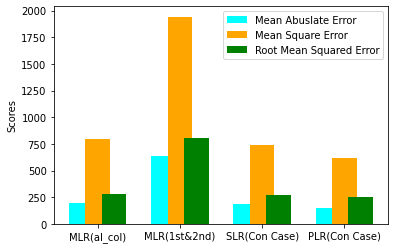

In [39]:

x = np.arange(4)
y1 = [mul_mean_abs_er*10, first_second_mean_abs_er*10, linear_mean_abs_er*10,pol_mean_abs_er*10]
y2 = [mul_mean_squ_er, first_second_mean_squ_er*.3, linear_mean_squ_er,pol_mean_squ_er]
y3 = [mul_Rot_mean_squ_er*10, first_second_Rot_mean_squ_er*10, linear_Rot_mean_squ_er*10,pol_Rot_mean_squ_er*10]
width = 0.3
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['MLR(al_col)','MLR(1st&2nd)','SLR(Con Case)','PLR(Con Case)'])

plt.ylabel("Scores")
plt.legend(["Mean Abuslate Error", "Mean Square Error", "Root Mean Squared Error"])
plt.show()